In [1]:
########################################################################
####                                                                ####
#### UNIVERSIDAD NACIONAL DE LOJA-CIS JOHN ALEJANDRO TORRES ALVAREZ ####
####                                                                ####
########################################################################

# TUTOR: Ing. Alexander Lopez
library(tm) # mineria de texto
library(SnowballC)# comparacion de palabras "es"
library(qdap)#  análisis cuantitativo del discurso corpus-agrupaciones
library(igraph) # gráficos simples y análisis de redes
library(devtools) # Desarrollo de paquetes y consumo de paquetes

library(syuzhet)#  El paquete viene con cuatro diccionarios de opinión y proporciona un método para acceder a la herramienta robusta
#library(Rstem) # El paquete proporciona una manera simple de calcular los tallos de cada palabra en un vector de caracteres (SnowballC)
library(NLP) # Clases y métodos básicos para el procesamiento del lenguaje natural
#library(sentiment) # clasificar las oraciones en las siguientes categorías de sentimientos: - Positivo, negativo, muy positivo, muy negativo, neutro.
                
                #Cada noche que bajo a la calle, el músico bajo toca el bajo bajo la luna.

library(wordcloud)# Funcionalidad para crear nubes de palabras, visualizar diferencias y similitudes entre documentos
library(RColorBrewer)# Proporciona esquemas de color para mapas (y otros gráficos)
library(stopwords) # Proporciona múltiples fuentes de palabras vacías, para usar en análisis de texto y procesamiento de lenguaje natural.

library(UsingR) #Manejo de estadisticas length
library(dplyr) # Trabaja con marcos de datos como objetos
library(plyr)# Marcos de trabajo
#library(foreign) # Lectura y escritura de datos almacenado
library(ggplot2) # Un sistema para crear gráficos 'declarativamente', basado en "La gramática de los gráficos"

library(SparseM)
library(RTextTools)#Create_matrix

Warning message:
"package 'tm' was built under R version 3.6.3"Loading required package: NLP
Warning message:
"package 'NLP' was built under R version 3.6.3"Warning message:
"package 'SnowballC' was built under R version 3.6.3"Warning message:
"package 'qdap' was built under R version 3.6.3"Loading required package: qdapDictionaries
Loading required package: qdapRegex
Warning message:
"package 'qdapRegex' was built under R version 3.6.3"Loading required package: qdapTools
Warning message:
"package 'qdapTools' was built under R version 3.6.3"Loading required package: RColorBrewer

Attaching package: 'qdap'

The following objects are masked from 'package:tm':

    as.DocumentTermMatrix, as.TermDocumentMatrix

The following object is masked from 'package:NLP':

    ngrams

The following object is masked from 'package:base':

    Filter

Warning message:
"package 'igraph' was built under R version 3.6.3"
Attaching package: 'igraph'

The following objects are masked from 'package:qdap':

  

In [2]:
R.Version()

$platform
[1] "x86_64-w64-mingw32"

$arch
[1] "x86_64"

$os
[1] "mingw32"

$system
[1] "x86_64, mingw32"

$status
[1] ""

$major
[1] "3"

$minor
[1] "6.1"

$year
[1] "2019"

$month
[1] "07"

$day
[1] "05"

$`svn rev`
[1] "76782"

$language
[1] "R"

$version.string
[1] "R version 3.6.1 (2019-07-05)"

$nickname
[1] "Action of the Toes"

In [3]:
 textos <- read.csv("./prueba.csv", sep=";")
textos<- textos$textoPurificado

In [4]:

textos

[1] teoria acerca de la creacion del covid como arma biologica                                                                                                                                                                                                                              
   [2] la hermana de mi abuelito ha superado el peligro del covid una guerrera sin duda alguna nuestra viejita ojo ella nunca tuvo fiebre ni tos ni otros sintomas del covid el virus solo afecto su presion la tuvo alta y perdio el habla hoy ya recuperada y de alta                        
   [3] remdesivir es el medicamento que acaban de inventar para curar el coronavirus covid que puso en jaque y en cuarentena al mundo entero dejando un saldo de miles de muertos perdidas economicas incalculables y mucha incertidumbre el antiviral fue anunciado hace unos momentos        
   [4] medios en nuestra residencia universitaria se alojara personal del el objetivo es salvaguardar su salud ya que por sus actividades estan en riesgo de contagio de covid les invitamos a escuchar la siguiente nota de                                                                   
   [5] mi padrastro se recupero del covid                                                                                                                                                                                                                                                      
   [6] la lista de afecciones vinculadas con el coronavirus se alarga con el paso de las semanas e incluye entre otras complicaciones inflamatorias neurologicas y cardiovasculares                                                                                                            
   [7] quiebra totalagenciane el de las pequeñas y medianas empresas del pais pymes se encuentran paralizadas como consecuencia de la cuarentena provocada por el covidley humanitaria trata de frenar cierre y desempleo                                                                      
   [8] atencion a esto ecuador madrid sevilla quito guayaquil cuenca lima bogota bsas mexico barcelona pamplona chile granada cartagena santamarta ibiza ambato salinas atacames tonsupa manabi otavalo coronavirus covid qanon covid                                                          
   [9] via a la costa y con objetivo de brindar una atencion medica oportuna y evitar complicaciones en el estado de salud de nuetros usuarios el personal del centro de salud puertohondo atiende a pacientes sintomaticos respiratorios o sospechosos de covid activadosporlasalud           
  [10] billeteras tarjetas y creditos digitales las fintech en tiempo de covid reborn nuevomundo                                                                                                                                                                                               
  [11] covid y los derechos laborales ambato mas detalles en                                                                                                                                                                                                                                   
  [12] doctor que opina sobre la vacuna bcg para prevenir el covid podria ser una opcion al menos de prevencion                                                                                                                                                                                
  [13] informe de la situacion del covid en azuay segun los datos proporcionados por el coe provincial noticias noticiasunsion coronavirusecuador ecuador azuay cuenca unidospodemos quedateencasa                                                                                             
  [14] igual no sirve de mucho esas cadenas porque las cifras de contagiados y muertos por covid no son reales esto es salvese quien pueda del virus                                                                                                               

In [5]:
StopWords <- read.csv("./StopWords.csv", fileEncoding = "UTF-8", sep=",")
StopWords

Nexos             Frecuencia
1   a                 956       
2   abre                1       
3   abriamos            1       
4   abrieron            1       
5   abrio               3       
6   aca                18       
7   acabo               8       
8   acaso               2       
9   acerca              2       
10  acercan             1       
11  aclarando           1       
12  aclaremos           2       
13  acorde              2       
14  acordemos           1       
15  acosta              1       
16  ademas              5       
17  adonde              1       
18  africa              1       
19  afrodescendientes   1       
20  afuera              1       
21  agregar             2       
22  ah                  4       
23  ahi                14       
24  ahora              52       
25  ahre                1       
26  al                177       
27  alcances            1       
28  alemana             1       
29  algo               25       
30  alguien            15       
... ...               ...       
662 via                 6       
663 vio                 4       
664 visible             1       
665 vision              1       
666 visita              2       
667 visitara            1       
668 vista               2       
669 viste               2       
670 visto               3       
671 volvemos            1       
672 volver              7       
673 volveremos          1       
674 volverlos           2       
675 vos                21       
676 voy                28       
677 voz                 8       
678 vs                  1       
679 vueltas             2       
680 vuelto              1       
681 vuelvas             1       
682 vuelve              4       
683 vuelven             3       
684 vuelvo              1       
685 vuestra             1       
686 vulnera             1       
687 y                 838       
688 ya                 85       
689 yaaaa               1       
690 yo                 70       
691 zas                 1

In [7]:
   #Carga la columna texto del dataframe tweets en un corpus nuevo
#corpusLim<-VCorpus(VectorSource(tweets$texto))
corpusLim<-VCorpus(VectorSource(textos))
#Omision de las palabras por medio del diccionario creado / Primera Columna 
corpusLim <- tm_map(corpusLim, removeWords, StopWords[,1])
#Se transporta el contenido del corpus a un dataframe 
DataFrameTexto<-data.frame(text=unlist(sapply(corpusLim, `[`, "content")))
#Se guarda en una variable toda la columna text del dataframe anterior
textos<-DataFrameTexto$text

In [8]:
textos

[1] teoria    creacion  covid  arma biologica                                                                                                                                                                                                         
   [2]  hermana   abuelito  superado  peligro  covid  guerrera  duda   viejita ojo    fiebre  tos   sintomas  covid  virus  afecto  presion   alta  perdio  habla   recuperada   alta                                                                    
   [3] remdesivir   medicamento  acaban  inventar  curar  coronavirus covid  puso  jaque   cuarentena  mundo entero dejando  saldo  miles  muertos perdidas economicas incalculables  mucha incertidumbre  antiviral  anunciado                          
   [4] medios   residencia universitaria  alojara personal   objetivo  salvaguardar  salud     actividades   riesgo  contagio  covid  invitamos  escuchar   nota                                                                                         
   [5]  padrastro  recupero  covid                                                                                                                                                                                                                       
   [6]  lista  afecciones vinculadas   coronavirus  alarga      semanas  incluye   complicaciones inflamatorias neurologicas  cardiovasculares                                                                                                           
   [7] quiebra totalagenciane    pequeñas  medianas empresas  pais pymes  encuentran paralizadas  consecuencia   cuarentena provocada   covidley humanitaria   frenar cierre  desempleo                                                                  
   [8] atencion    madrid sevilla  guayaquil cuenca lima bogota bsas mexico barcelona pamplona chile granada cartagena santamarta ibiza ambato salinas atacames tonsupa manabi otavalo coronavirus covid qanon covid                                     
   [9]    costa   objetivo  brindar  atencion medica oportuna  evitar complicaciones   estado  salud  nuetros usuarios  personal  centro  salud puertohondo atiende  pacientes sintomaticos respiratorios  sospechosos  covid activadosporlasalud        
  [10] billeteras tarjetas  creditos digitales  fintech  tiempo  covid reborn nuevomundo                                                                                                                                                                 
  [11] covid   derechos laborales ambato  detalles                                                                                                                                                                                                       
  [12] doctor  opina   vacuna bcg  prevenir  covid podria   opcion  menos  prevencion                                                                                                                                                                    
  [13] informe   situacion  covid  azuay   datos proporcionados   coe provincial noticias noticiasunsion coronavirusecuador  azuay cuenca unidospodemos quedateencasa                                                                                    
  [14] igual no sirve    cadenas   cifras  contagiados  muertos  covid no  reales   salvese    virus                                                                                                                                                     
  [15] si  persona   mal  toma  auto  irse  realizar  prueba  covid   multada  aplica  excepcion                                                                                                                                                         
  [16] trump acusa  inmigrantes  traer  covid   enfermedades  eeuu                                                                                                                                                                                       
  [

In [9]:
corpusFreQ=Corpus(VectorSource(textos)) 

In [10]:
corpusFreQ

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 2019

In [11]:
content(corpusFreQ[1:10])

[1] "teoria    creacion  covid  arma biologica"                                                                                                                                                                                                 
 [2] " hermana   abuelito  superado  peligro  covid  guerrera  duda   viejita ojo    fiebre  tos   sintomas  covid  virus  afecto  presion   alta  perdio  habla   recuperada   alta"                                                            
 [3] "remdesivir   medicamento  acaban  inventar  curar  coronavirus covid  puso  jaque   cuarentena  mundo entero dejando  saldo  miles  muertos perdidas economicas incalculables  mucha incertidumbre  antiviral  anunciado   "               
 [4] "medios   residencia universitaria  alojara personal   objetivo  salvaguardar  salud     actividades   riesgo  contagio  covid  invitamos  escuchar   nota "                                                                                
 [5] " padrastro  recupero  covid"                                                                                                                                                                                                               
 [6] " lista  afecciones vinculadas   coronavirus  alarga      semanas  incluye   complicaciones inflamatorias neurologicas  cardiovasculares"                                                                                                   
 [7] "quiebra totalagenciane    pequeñas  medianas empresas  pais pymes  encuentran paralizadas  consecuencia   cuarentena provocada   covidley humanitaria   frenar cierre  desempleo"                                                          
 [8] "atencion    madrid sevilla  guayaquil cuenca lima bogota bsas mexico barcelona pamplona chile granada cartagena santamarta ibiza ambato salinas atacames tonsupa manabi otavalo coronavirus covid qanon covid"                             
 [9] "   costa   objetivo  brindar  atencion medica oportuna  evitar complicaciones   estado  salud  nuetros usuarios  personal  centro  salud puertohondo atiende  pacientes sintomaticos respiratorios  sospechosos  covid activadosporlasalud"
[10] "billeteras tarjetas  creditos digitales  fintech  tiempo  covid reborn nuevomundo"

In [15]:
###############################################################################
################################### NAIVE BAYES  #############################
#############################################################################

            #  %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% #
            # %%%%%%%%%%%%%%%%%% CODIFICACION ALGORITMO NAIVE BAYES %%%%%%%%%%%%%%% # 
            # %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% 
                 # print(paste(index,": INDEX"))
                  
clasificarOpiniones <- function(textColumns,algoritmo="bayes",probabilidadFuerte=0.5,probabilidadDebil=1.0,probabilidadPrevia=1.0,verbose=TRUE,...) {
  
  sink("Reporte.txt")
  alcanceDS <- create_matrix(textColumns,...)
  #lexiconSen <- read.csv("D:/Desktop/UTE/MetodologiaCodigoResultados/04 mineria de datos R/DicPrueba.csv",  fileEncoding = "UTF-8",header = TRUE)  
  lexiconSen <- read.csv("D:/Desktop/UTE/MetodologiaCodigoResultados/04 mineria de datos R/MASTER.csv", sep=";",header = TRUE)        
  
  claveLexico <- list(positivo=length(which(lexiconSen[,3]=="positivo")),negativo=length(which(lexiconSen[,3]=="negativo")),total=nrow(lexiconSen))
  documentos <- c()# contadorLexico OutPut: positivo:8918 negativo:13046 total:21964
  conLexNeg <- 0
  conLexPos <- 0
  conLexNeu <- 0
  
  for (i in 1:nrow(alcanceDS)){
    # verbose: mostrar información del proceso por pantalla.
    if (verbose) print(paste("DOCUMENTO: ",i))
    puntuacionTotal <- list(positivo=0,negativo=0) #contadorLexico de positivos y negativos (columna)
    doc <- alcanceDS[i,]#recorrido de cada opinion (filas)
    palabras <- findFreqTerms(doc,lowfreq=1) # frecuencia de palabras (nivel de oracion)
    
    for (palabra in palabras) { #palabra (Lexicon) #palabraS(Nivel de oracion) 
      idLexicon <- match(palabra,lexiconSen[,1], nomatch=0)# (ID)Registro de palabra encontrada (Diccionario)
      if (idLexicon > 0) {
        entrada <- lexiconSen[idLexicon,]
        valorPolaridad <- as.character(entrada[[2]])#columna 2 (valor)
        polaridadOpinion <- as.character(entrada[[3]])#columna 3 (sentimiento polaridad)
        clave <- claveLexico[[polaridadOpinion]] #ID Palabra lexicon
        puntuacionPrevia <- probabilidadDebil #probabilidad de un termino debilmente subjetivo
        
        #if (valorPolaridad == "NULL") puntuacionPrevia <- probabilidadFuerte
        if (algoritmo=="bayes") 
          puntuacionPrevia <- abs(log(puntuacionPrevia*probabilidadPrevia/clave))#CALCULO valor absoluto de puntuacionPrevia
        if (verbose) {
          print(paste("palabra: ",palabra," VAL: ",valorPolaridad," POL: ",polaridadOpinion," puntuacionPrevia: ",puntuacionPrevia))
         # print(paste(clave,"--clave"))
        }
        
        puntuacionTotal[[polaridadOpinion]] <- puntuacionTotal[[polaridadOpinion]]+puntuacionPrevia #Acumulador (+) (-)
        #print(paste(puntuacionTotal,"pT")) # Presentacion columna acumulador (+) (-)
        
      } 
    } # fin for Lexicon vs Oracion
    
    if (algoritmo=="bayes") {
      for (id in names(puntuacionTotal)) {
        clave <- claveLexico[[id]] # clave:8918 (IDE:positivo) y clave: 13046(IDE:negativo) 
       # print(paste(id,":ID ")) 
        total <- claveLexico[["total"]] # *constante (total:21964)* Rango total del Lexicon
        puntuacionPrevia <- abs(log(clave/total)) # calculo de reajuste
        puntuacionTotal[[id]] <- puntuacionTotal[[id]]+puntuacionPrevia # aplicacion de reajuste
       # print(paste( clave,":clave ", total,":total",puntuacionPrevia,":pPrevia",puntuacionTotal,":pTotal"))
      }
    } else {
      for (id in names(puntuacionTotal)) {
        puntuacionTotal[[id]] <- puntuacionTotal[[id]]+0.01
      }
    }
    ################################## Comprobaciones e incremento de contadores + - +/-
    if (puntuacionTotal$positivo>puntuacionTotal$negativo) {
      Mejor_Ajuste <- "positivo" 
      conLexPos <- conLexPos + 1
    }else if (puntuacionTotal$positivo<puntuacionTotal$negativo){
      Mejor_Ajuste <- "negativo" 
      conLexNeg <- conLexNeg + 1
    }else if (all(puntuacionTotal$positivo == puntuacionTotal$negativo) == TRUE){
      Mejor_Ajuste <- "neutral" 
      conLexNeu <- conLexNeu + 1
    }
   ################################## Creacion de texto plano, se guarda los datos generados en 4 columnas
    documentos <- rbind(documentos,c(puntuacionTotal$positivo,puntuacionTotal$negativo,abs(puntuacionTotal$positivo/puntuacionTotal$negativo),Mejor_Ajuste))
    
   ################## R e p o r t e   e n    T X T (por cada oracion)
     if (verbose) {
      print(paste("POS:",puntuacionTotal$positivo,"NEG:",puntuacionTotal$negativo,"CAL:",abs(puntuacionTotal$positivo/puntuacionTotal$negativo)))
      cat("\n")#salto de linea
    }
  }#llave fin for DATASET
  

  
  ########################### R E P O R T E  Al  P I E   T X T #########################
  write.table(documentos, file = "check_valorPolaridad.csv", append = FALSE, quote = FALSE, sep = ";",eol = "\n", na = "NO ASIGNADO")
  print(paste("Positivos: ",conLexPos,"Negativos: ",conLexNeg,"Neutrales: ",conLexNeu))
  cat("\n")# salto de linea
  sink()#cierre de txt
  ##############################################################################
  
  # encabezado de texto plano
  colnames(documentos) <- c("POSITIVO","NEGATIVO","POSITIVO/NEGATIVO","Mejor_Ajuste")
  
  # retorno de la funcion
  return(documentos)

  }# llave  F I N   F U N C I O N

In [16]:
######################################################################################################################        

 #IMPLEMENTACION DEL ALGORITMO NAIVE BAYES

########################################################################################################################

clasificacion_polaridad = clasificarOpiniones(textos,algoritmo="bayes", probabilidadPrevia=1.0)
#Seleccion de la columna Best_fit (Mejor-ajuste) como polaridad
polaridad = clasificacion_polaridad[,4] 

Warning message in TermDocumentMatrix.SimpleCorpus(x, control):
"custom functions are ignored"Warning message in TermDocumentMatrix.SimpleCorpus(x, control):
"custom tokenizer is ignored"

In [17]:
resultadoClasificacion = data.frame(text=corpusFreQ,polaridad=clasificacion_polaridad, stringsAsFactors=FALSE)

In [18]:
resultadoClasificacion

text.doc_id
1    1          
2    2          
3    3          
4    4          
5    5          
6    6          
7    7          
8    8          
9    9          
10   10         
11   11         
12   12         
13   13         
14   14         
15   15         
16   16         
17   17         
18   18         
19   19         
20   20         
21   21         
22   22         
23   23         
24   24         
25   25         
26   26         
27   27         
28   28         
29   29         
30   30         
...  ...        
1990 1990       
1991 1991       
1992 1992       
1993 1993       
1994 1994       
1995 1995       
1996 1996       
1997 1997       
1998 1998       
1999 1999       
2000 2000       
2001 2001       
2002 2002       
2003 2003       
2004 2004       
2005 2005       
2006 2006       
2007 2007       
2008 2008       
2009 2009       
2010 2010       
2011 2011       
2012 2012       
2013 2013       
2014 2014       
2015 2015       
2016 2016       
2017 2017       
2018 2018       
2019 2019       
     text.text                                                                                                                                                                                                                                 
1    teoria    creacion  covid  arma biologica                                                                                                                                                                                                 
2     hermana   abuelito  superado  peligro  covid  guerrera  duda   viejita ojo    fiebre  tos   sintomas  covid  virus  afecto  presion   alta  perdio  habla   recuperada   alta                                                            
3    remdesivir   medicamento  acaban  inventar  curar  coronavirus covid  puso  jaque   cuarentena  mundo entero dejando  saldo  miles  muertos perdidas economicas incalculables  mucha incertidumbre  antiviral  anunciado                  
4    medios   residencia universitaria  alojara personal   objetivo  salvaguardar  salud     actividades   riesgo  contagio  covid  invitamos  escuchar   nota                                                                                 
5     padrastro  recupero  covid                                                                                                                                                                                                               
6     lista  afecciones vinculadas   coronavirus  alarga      semanas  incluye   complicaciones inflamatorias neurologicas  cardiovasculares                                                                                                   
7    quiebra totalagenciane    pequeñas  medianas empresas  pais pymes  encuentran paralizadas  consecuencia   cuarentena provocada   covidley humanitaria   frenar cierre  desempleo                                                          
8    atencion    madrid sevilla  guayaquil cuenca lima bogota bsas mexico barcelona pamplona chile granada cartagena santamarta ibiza ambato salinas atacames tonsupa manabi otavalo coronavirus covid qanon covid                             
9       costa   objetivo  brindar  atencion medica oportuna  evitar complicaciones   estado  salud  nuetros usuarios  personal  centro  salud puertohondo atiende  pacientes sintomaticos respiratorios  sospechosos  covid activadosporlasalud
10   billeteras tarjetas  creditos digitales  fintech  tiempo  covid reborn nuevomundo                                                                                                                                                         
11   covid   derechos laborales ambato  detalles                                                                                                                                                                                               
12   doctor  opina   vacuna bcg  prevenir  covid podria   opcion  menos

In [27]:
##################################################################
        #  SUMATORIA
##################################################################
names (resultadoClasificacion)[1] = "id"
names (resultadoClasificacion)[2] = "text"
names (resultadoClasificacion)[3] = "POSITIVO"
names (resultadoClasificacion)[4] = "NEGATIVO"
names (resultadoClasificacion)[5] = "POSITIVO/NEGATIVO"
names (resultadoClasificacion)[6] = "Mejor_Ajuste"

sentiPositivos<- as.numeric (resultadoClasificacion$POSITIVO)
sentiNegativos<- as.numeric (resultadoClasificacion$NEGATIVO)

#Redondeo de las variables a solo dos decimas
sentiPositivos<- round(sentiPositivos,2)
sentiNegativos<- round(sentiNegativos,2)


In [28]:
#Se realiza una resta simple entre las dos variables
fn=length(resultadoClasificacion$text)
for(i in 1:fn){
  num=0
  resta=0
  num=(sentiPositivos[i]-sentiNegativos[i])
  resta<-as.numeric(num)
  resultadoClasificacion$SUMATORIA[i]=resta # SE GUARDA EL NUEVO VALOR SENTIMIENTO
  #print(resta)
}


In [29]:
for(i in 1:fn){
  num1=0
  #positivo
  num1=resultadoClasificacion$POSITIVO[i]
  num1<- as.numeric(num1)
  num1=round(num1,2)
  resultadoClasificacion$POSITIVO[i]=num1
  
}


In [30]:
for(i in 1:fn){
  num1=0
  #negativo
  num1=resultadoClasificacion$NEGATIVO[i]
  num1<- as.numeric(num1)
  num1=round(num1,2)
  resultadoClasificacion$NEGATIVO[i]=num1
  
}

In [31]:
for(i in 1:fn){
  num1=0
  #P/N
  num1=resultadoClasificacion$`POSITIVO/NEGATIVO`[i]
  num1<- as.numeric(num1)
  num1=round(num1,2)
  resultadoClasificacion$`POSITIVO/NEGATIVO`[i]=num1
  
}


In [32]:
for(i in 1:fn){
  num1=0
  #Sumatoria
  num1=resultadoClasificacion$SUMATORIA[i]
  num1<- as.numeric(num1)
  num1=round(num1,2)
  resultadoClasificacion$SUMATORIA[i]=num1
  
}

In [33]:
resultadoClasificacion

id  
1    1   
2    2   
3    3   
4    4   
5    5   
6    6   
7    7   
8    8   
9    9   
10   10  
11   11  
12   12  
13   13  
14   14  
15   15  
16   16  
17   17  
18   18  
19   19  
20   20  
21   21  
22   22  
23   23  
24   24  
25   25  
26   26  
27   27  
28   28  
29   29  
30   30  
...  ... 
1990 1990
1991 1991
1992 1992
1993 1993
1994 1994
1995 1995
1996 1996
1997 1997
1998 1998
1999 1999
2000 2000
2001 2001
2002 2002
2003 2003
2004 2004
2005 2005
2006 2006
2007 2007
2008 2008
2009 2009
2010 2010
2011 2011
2012 2012
2013 2013
2014 2014
2015 2015
2016 2016
2017 2017
2018 2018
2019 2019
     text                                                                                                                                                                                                                                      
1    teoria    creacion  covid  arma biologica                                                                                                                                                                                                 
2     hermana   abuelito  superado  peligro  covid  guerrera  duda   viejita ojo    fiebre  tos   sintomas  covid  virus  afecto  presion   alta  perdio  habla   recuperada   alta                                                            
3    remdesivir   medicamento  acaban  inventar  curar  coronavirus covid  puso  jaque   cuarentena  mundo entero dejando  saldo  miles  muertos perdidas economicas incalculables  mucha incertidumbre  antiviral  anunciado                  
4    medios   residencia universitaria  alojara personal   objetivo  salvaguardar  salud     actividades   riesgo  contagio  covid  invitamos  escuchar   nota                                                                                 
5     padrastro  recupero  covid                                                                                                                                                                                                               
6     lista  afecciones vinculadas   coronavirus  alarga      semanas  incluye   complicaciones inflamatorias neurologicas  cardiovasculares                                                                                                   
7    quiebra totalagenciane    pequeñas  medianas empresas  pais pymes  encuentran paralizadas  consecuencia   cuarentena provocada   covidley humanitaria   frenar cierre  desempleo                                                          
8    atencion    madrid sevilla  guayaquil cuenca lima bogota bsas mexico barcelona pamplona chile granada cartagena santamarta ibiza ambato salinas atacames tonsupa manabi otavalo coronavirus covid qanon covid                             
9       costa   objetivo  brindar  atencion medica oportuna  evitar complicaciones   estado  salud  nuetros usuarios  personal  centro  salud puertohondo atiende  pacientes sintomaticos respiratorios  sospechosos  covid activadosporlasalud
10   billeteras tarjetas  creditos digitales  fintech  tiempo  covid reborn nuevomundo                                                                                                                                                         
11   covid   derechos laborales ambato  detalles                                                                                                                                                                                               
12   doctor  opina   vacuna bcg  prevenir  covid podria   opcion  menos  prevencion                                                                                                                                                            
13   informe   situacion  covid  azuay   datos proporcionados   coe provincial noticias noticiasunsion coronavirusecuador  azuay cuenca unidospodemos quedateencasa                                                                            
14   igual no sirve    ca

In [34]:
###################################################################################################################
##################################### Exportacion para plotear las reglas de cada tweet ##########################################
##################################################################################################################
tweets_pos <- resultadoClasificacion$text[resultadoClasificacion$Mejor_Ajuste=="positivo"]
tweets_neg <- resultadoClasificacion$text[resultadoClasificacion$Mejor_Ajuste=="negativo"]
tweets_neu <- resultadoClasificacion$text[resultadoClasificacion$Mejor_Ajuste=="neutral"]

#Transformacion de vectores (sentimientos-polaridad) a data frame ####### RA Positivo ##########
tweetsPositivos<-as.data.frame(as.matrix(tweets_pos))
#corpusLim<-VCorpus(VectorSource(tweets$texto))
corpusLim<-VCorpus(VectorSource(tweetsPositivos$V1))
#Omision de las palabras por medio del diccionario creado / Primera Columna 
corpusLim <- tm_map(corpusLim, removeWords, c("no","si","h"))
#Se transporta el contenido del corpus a un dataframe 
DataFramePositivo<-data.frame(text=unlist(sapply(corpusLim, `[`, "content")))
#Exportacion de dataframe a archivos formato csv
write.csv(DataFramePositivo$text,"ClasificacionPositivos.csv")

#Transformacion de vectores (sentimientos-polaridad) a data frame #######RA Negativo ############
tweetsNegativos<-as.data.frame(as.matrix(tweets_neg))
#corpusLim<-VCorpus(VectorSource(tweets$texto))
corpusLim<-VCorpus(VectorSource(tweetsNegativos$V1))
#Omision de las palabras por medio del diccionario creado / Primera Columna 
corpusLim <- tm_map(corpusLim, removeWords, c("no","si","h"))
#Se transporta el contenido del corpus a un dataframe 
DataFrameNegativo<-data.frame(text=unlist(sapply(corpusLim, `[`, "content")))
#Exportacion de dataframe a archivos formato csv
write.csv(DataFrameNegativo$text,"ClasificacionNegativos.csv")

#Transformacion de vectores (sentimientos-polaridad) a data frame ######## RA Neutro ###########
tweetsNeutros<-as.data.frame(as.matrix(tweets_neu))
#corpusLim<-VCorpus(VectorSource(tweets$texto))
corpusLim<-VCorpus(VectorSource(tweetsNeutros$V1))
#Omision de las palabras por medio del diccionario creado / Primera Columna 
corpusLim <- tm_map(corpusLim, removeWords, c("no","si","h"))
#Se transporta el contenido del corpus a un dataframe 
DataFrameNeutro<-data.frame(text=unlist(sapply(corpusLim, `[`, "content")))
#Exportacion de dataframe a archivos formato csv
write.csv(DataFrameNeutro$text,"ClasificacionNeutros.csv")

In [37]:
install.packages("grid")
install.packages("arules")
install.packages("arulesViz")


Warning message:
"package 'grid' is not available (for R version 3.6.1)"Warning message:
"package 'grid' is a base package, and should not be updated"

package 'arules' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\AlejandroDeLaTorre\AppData\Local\Temp\Rtmpqsh9s5\downloaded_packages


also installing the dependencies 'gtools', 'TSP', 'qap', 'gclus', 'dendextend', 'gplots', 'registry', 'htmlwidgets', 'seriation', 'scatterplot3d', 'plotly', 'visNetwork'




  There is a binary version available but the source version is later:
           binary source needs_compilation
dendextend 1.14.0 1.15.1             FALSE

package 'gtools' successfully unpacked and MD5 sums checked
package 'TSP' successfully unpacked and MD5 sums checked
package 'qap' successfully unpacked and MD5 sums checked
package 'gclus' successfully unpacked and MD5 sums checked
package 'gplots' successfully unpacked and MD5 sums checked
package 'registry' successfully unpacked and MD5 sums checked
package 'htmlwidgets' successfully unpacked and MD5 sums checked
package 'seriation' successfully unpacked and MD5 sums checked
package 'scatterplot3d' successfully unpacked and MD5 sums checked
package 'plotly' successfully unpacked and MD5 sums checked
package 'visNetwork' successfully unpacked and MD5 sums checked
package 'arulesViz' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\AlejandroDeLaTorre\AppData\Local\Temp\Rtmpqsh9s5\downlo

installing the source package 'dendextend'



In [50]:
library(grid)
library(arules)
library(arulesViz)


In [41]:
#Reglas y asociaciones             
RApositivo<-read.transactions(file = "./ClasificacionPositivos.csv",format="basket",sep = " ",rm.duplicates = TRUE)
RAnegativo<-read.transactions(file = "./ClasificacionNegativos.csv",format="basket",sep = " ",rm.duplicates = TRUE)
RAneutro<-read.transactions(file = "./ClasificacionNeutros.csv",format="basket",sep = " ",rm.duplicates = TRUE)

distribution of transactions with duplicates:
items
  1   2   3   4   5   6 
190  57  23  11   3   2 


In [42]:
summary(RApositivo)

transactions as itemMatrix in sparse format with
 1140 rows (elements/itemsets/transactions) and
 1140 columns (items) and a density of 0.000877193 

most frequent items:
                                                                                                                                                                                                                    ,x 
                                                                                                                                                                                                                     1 
                                                           1,medios   residencia universitaria  alojara personal   objetivo  salvaguardar  salud     actividades   riesgo  contagio  covid  invitamos  escuchar   nota 
                                                                                                                                                                                     

In [43]:
summary(RAnegativo)

transactions as itemMatrix in sparse format with
 1140 rows (elements/itemsets/transactions) and
 5473 columns (items) and a density of 0.002336831 

most frequent items:
   covid    salud    casos atencion  trabajo  (Other) 
     986      134       96       87       84    13193 

element (itemset/transaction) length distribution:
sizes
 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 
 8  9 18 29 45 67 53 61 65 52 52 60 64 78 74 88 68 69 68 41 37 19  9  4  1  1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    8.00   13.00   12.79   17.00   26.00 

includes extended item information - examples:
          labels
1             ab
2     abandonado
3 abastecimiento

In [44]:
summary(RAneutro)

transactions as itemMatrix in sparse format with
 163 rows (elements/itemsets/transactions) and
 163 columns (items) and a density of 0.006134969 

most frequent items:
                                                                                                                                                                         ,x 
                                                                                                                                                                          1 
                                                                                                                                1,teoria    creacion  covid  arma biologica 
                                                                                                                                                                          1 
10,tungurahua registra casos confirmados  covid  ambato  pelileo  quero  tisaleo  baños  cevallos  patate   pillaro  muertes   reportan per

In [45]:
reglaPositiva<-apriori(RApositivo, parameter = list(support=0.009, confidence=0.9,target="rules"))
reglaPositiva.sorted<-sort(reglaPositiva, by="lift")
inspect(reglaPositiva.sorted)
length(reglaPositiva)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.9    0.1    1 none FALSE            TRUE       5   0.009      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 10 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[1140 item(s), 1140 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


[1] 0

In [46]:
reglaNegativa<-apriori(RAnegativo, parameter = list(support=0.009, confidence=0.9,target="rules"))
reglaNegativa.sorted<-sort(reglaNegativa, by="lift")
inspect(reglaNegativa.sorted)
length(reglaNegativa)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.9    0.1    1 none FALSE            TRUE       5   0.009      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 10 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[5473 item(s), 1140 transaction(s)] done [0.01s].
sorting and recoding items ... [170 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.00s].
writing ... [251 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
      lhs                      rhs                support confidence    coverage      lift count
[1]   {confirmados,                                                                             
       hospitalaria}        => {alta}         0.009649123  1.0000000 0.009649123 43.84

[1] 251

In [47]:
reglaNeutra<-apriori(RAneutro, parameter = list(support=0.009, confidence=0.9,target="rules"))
reglaNeutra.sorted<-sort(reglaNeutra, by="lift")
inspect(reglaNeutra.sorted)
length(reglaNeutra)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.9    0.1    1 none FALSE            TRUE       5   0.009      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[163 item(s), 163 transaction(s)] done [0.00s].
sorting and recoding items ... [0 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


[1] 0

Warning message:
"Unknown control parameters: type"

Available control parameters (with default values):
main	 =  Graph for 100 rules
max	 =  100
nodeCol	 =  c("#EE0000FF", "#EE0303FF", "#EE0606FF", "#EE0909FF", "#EE0C0CFF", "#EE0F0FFF", "#EE1212FF", "#EE1515FF", "#EE1818FF", "#EE1B1BFF", "#EE1E1EFF", "#EE2222FF", "#EE2525FF", "#EE2828FF", "#EE2B2BFF", "#EE2E2EFF", "#EE3131FF", "#EE3434FF", "#EE3737FF", "#EE3A3AFF", "#EE3D3DFF", "#EE4040FF", "#EE4444FF", "#EE4747FF", "#EE4A4AFF", "#EE4D4DFF", "#EE5050FF", "#EE5353FF", "#EE5656FF", "#EE5959FF", "#EE5C5CFF", "#EE5F5FFF", "#EE6262FF", "#EE6666FF", "#EE6969FF", "#EE6C6CFF", "#EE6F6FFF", "#EE7272FF", "#EE7575FF",  "#EE7878FF", "#EE7B7BFF", "#EE7E7EFF", "#EE8181FF", "#EE8484FF", "#EE8888FF", "#EE8B8BFF", "#EE8E8EFF", "#EE9191FF", "#EE9494FF", "#EE9797FF", "#EE9999FF", "#EE9B9BFF", "#EE9D9DFF", "#EE9F9FFF", "#EEA0A0FF", "#EEA2A2FF", "#EEA4A4FF", "#EEA5A5FF", "#EEA7A7FF", "#EEA9A9FF", "#EEABABFF", "#EEACACFF", "#EEAEAEFF", "#EEB0B0FF", "#EEB1B1FF", "#EEB3B3FF", "#EEB5B5FF", "#EEB7B7FF", "#EEB8B8

Warning message:
"plot: Too many rules supplied. Only plotting the best 100 rules using 'support' (change control parameter max if needed)"

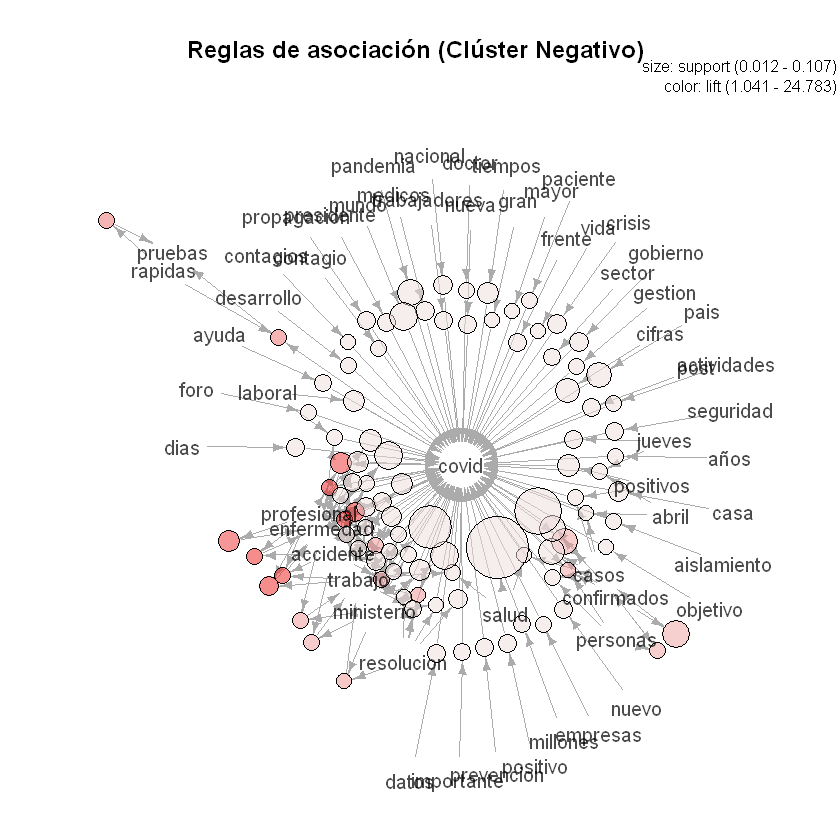

In [53]:
#plot(reglaPositiva.sorted,measure=c("support","confidence"),shading="lift",main = "Reglas de asociacion positivas")
plot(reglaNegativa.sorted,method="graph",control=list(type="items"),main ="Reglas de asociación (Clúster Negativo) ")